# **Predicting Insurance Claim Amounts**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load dataset
df = pd.read_csv("insurance.csv")

# Basic structure
print(df.shape)
print(df.columns)
print(df.head())

(1338, 7)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')
   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


In [3]:
# Encode categorical features: sex, smoker, region
df_encoded = df.copy()
le = LabelEncoder()
for col in ['sex', 'smoker', 'region']:
    df_encoded[col] = le.fit_transform(df_encoded[col])

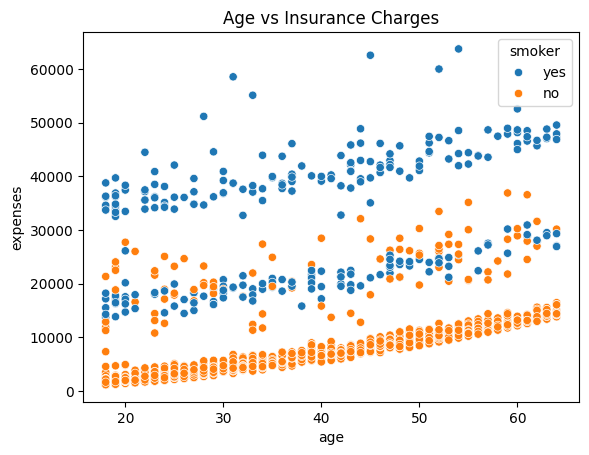

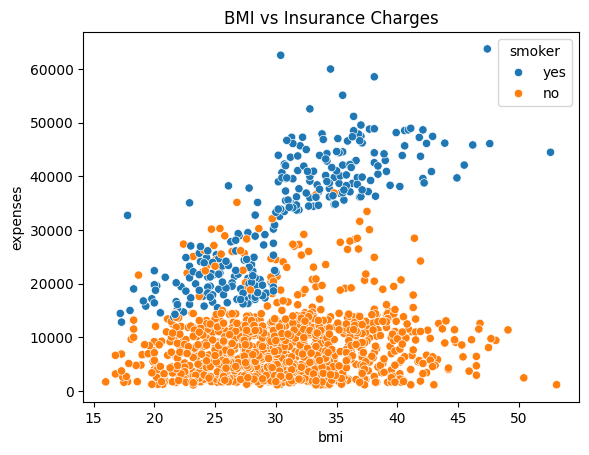

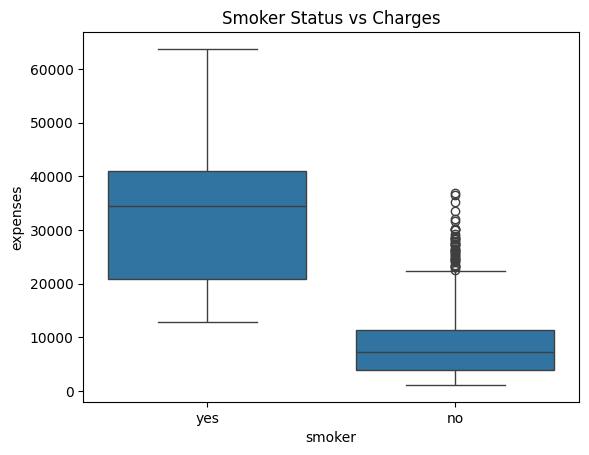

In [4]:
# Charges vs Age
sns.scatterplot(data=df, x='age', y='expenses', hue='smoker')
plt.title("Age vs Insurance Charges")
plt.show()

# Charges vs BMI
sns.scatterplot(data=df, x='bmi', y='expenses', hue='smoker')
plt.title("BMI vs Insurance Charges")
plt.show()

# Boxplot: Smoker vs Charges
sns.boxplot(data=df, x='smoker', y='expenses')
plt.title("Smoker Status vs Charges")
plt.show()

In [6]:
# Define features and target
X = df_encoded.drop('expenses', axis=1)
y = df_encoded['expenses']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [7]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 4186.940106317013
Root Mean Squared Error (RMSE): 5799.920265829357
